In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

<font size=6 color='red'><b>02_딥러닝입문_분류분석</b></font>

In [6]:
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩 (추천)
import pandas as pd #원핫인코딩 가능
from tensorflow.keras.models import Sequential, load_model #모델 생성, 모델 load
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 딥러닝 : 데이터의 규칙성을 추출
- 응용분야 : 글씨인식, 문장분류, 예측, 질병진단, 얼굴인식
- ML/DL의 종류
    - 지도학습 (독립=입력변수, 타켓=종속변수)
        - 분류분석 (타겟변수가 category 변수인 분석. 다준분류 vs 이진분류) vs 회귀분석
    - 비지도학습 (입력변수)
        - 군집화
    - 강화학습
- 지도학습해서의 딥러닝 프로그래밍 방식
    - 1. 데이터 확보 및 생성
    - 2. 데이터 전처리 : 스케일 조정, 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋
    - 3. 모델구성
    - 4. 모델 학습과정 설정
    - 5. 모델 학습시키기 (훈련데이터셋 + 검증데이터셋)
    - 6. 모델 평가하기 (시험데이터셋)
    - 7. 모델 사용 (입력값을 주어지면 예측값을 받기)
    
# 1,2. 데이터셋 생성 및 전처리

In [9]:
# 학습데이터 = 훈련데이터셋
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2,4,6,8,10,12,14,16,18])

In [18]:
# 인코딩 종류 (라벨인코딩, 원핫인코딩)
data = np.array(['a', 'b', 'c', 'b', 'b'])
print('원데이터 :', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('라벨인코딩된 데이터 :', labeling_data)
one_hot_encoding_data = to_categorical(labeling_data)
print('원핫인코딩된 데이터 :\n', one_hot_encoding_data)

원데이터 : ['a' 'b' 'c' 'b' 'b']
라벨인코딩된 데이터 : [0 1 2 1 1]
원핫인코딩된 데이터 :
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [21]:
#원핫인코딩 (분류 분석을 위한 target 변수, 타겟변수는 꼭 원핫인코딩을 해야한다)
data = np.array([1,4,5,4,5])
categorical_onehot = to_categorical(data)
print('to_categorical 이용 \n', categorical_onehot)
getdummies_onehot = pd.get_dummies(data)
print('get_dummies 이용 \n', getdummies_onehot)
print(type(categorical_onehot), type(getdummies_onehot))

to_categorical 이용 
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
get_dummies 이용 
    1  4  5
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  0  0  1
<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [26]:
# 분류분석을 위한 target 변수 원핫인코딩
Y_train = to_categorical(y_train, 19)
Y_val = to_categorical(y_val)

In [29]:
x_train.shape, Y_train.shape, x_val.shape, Y_val.shape

((90,), (90, 19), (9,), (9, 19))

# 3. 모델구성

In [30]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(38, activation='sigmoid')) # 활성화 함수 : relu, elu, tanh, sigmoid
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(19, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


4. 모델 학습과정 설정
- 회귀분석에서의 loss : mse, rmse, mae
- 분류회귀에서의 loss : categorical_crossentropy


In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기

In [32]:
hist = model.fit(x_train, Y_train, epochs=300, batch_size=10, validation_data=(x_val, Y_val), verbose=2)
# verbose=0:출력없음 / 1:기본값출력 / 2:에포크별 자세한 로그출력

Epoch 1/300
9/9 - 1s - loss: 2.9695 - accuracy: 0.0333 - val_loss: 2.7571 - val_accuracy: 0.1111 - 532ms/epoch - 59ms/step
Epoch 2/300
9/9 - 0s - loss: 2.6701 - accuracy: 0.0889 - val_loss: 2.5520 - val_accuracy: 0.1111 - 28ms/epoch - 3ms/step
Epoch 3/300
9/9 - 0s - loss: 2.5174 - accuracy: 0.1333 - val_loss: 2.4183 - val_accuracy: 0.2222 - 29ms/epoch - 3ms/step
Epoch 4/300
9/9 - 0s - loss: 2.3829 - accuracy: 0.1667 - val_loss: 2.3086 - val_accuracy: 0.2222 - 32ms/epoch - 4ms/step
Epoch 5/300
9/9 - 0s - loss: 2.2761 - accuracy: 0.2778 - val_loss: 2.2162 - val_accuracy: 0.3333 - 30ms/epoch - 3ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1851 - accuracy: 0.3556 - val_loss: 2.1309 - val_accuracy: 0.3333 - 32ms/epoch - 4ms/step
Epoch 7/300
9/9 - 0s - loss: 2.1126 - accuracy: 0.3333 - val_loss: 2.0536 - val_accuracy: 0.3333 - 30ms/epoch - 3ms/step
Epoch 8/300
9/9 - 0s - loss: 2.0468 - accuracy: 0.2000 - val_loss: 1.9819 - val_accuracy: 0.2222 - 31ms/epoch - 3ms/step
Epoch 9/300
9/9 - 0s - loss: 1

Epoch 69/300
9/9 - 0s - loss: 0.4882 - accuracy: 0.9778 - val_loss: 0.4695 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 70/300
9/9 - 0s - loss: 0.4762 - accuracy: 1.0000 - val_loss: 0.4624 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 71/300
9/9 - 0s - loss: 0.4592 - accuracy: 1.0000 - val_loss: 0.4420 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 72/300
9/9 - 0s - loss: 0.4466 - accuracy: 0.9333 - val_loss: 0.4305 - val_accuracy: 0.8889 - 28ms/epoch - 3ms/step
Epoch 73/300
9/9 - 0s - loss: 0.4470 - accuracy: 0.9778 - val_loss: 0.4237 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 74/300
9/9 - 0s - loss: 0.4247 - accuracy: 0.9667 - val_loss: 0.4096 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 75/300
9/9 - 0s - loss: 0.4238 - accuracy: 1.0000 - val_loss: 0.4005 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 76/300
9/9 - 0s - loss: 0.4018 - accuracy: 1.0000 - val_loss: 0.3967 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0675 - accuracy: 1.0000 - val_loss: 0.0654 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0669 - accuracy: 1.0000 - val_loss: 0.0629 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0648 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0620 - accuracy: 1.0000 - val_loss: 0.0591 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0597 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0577 - accuracy: 1.0000 - val_loss: 0.0563 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0576 - accuracy: 1.0000 - val_loss: 0.0545 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0553 - accuracy: 1.0000 - val_loss: 0.0528 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 278/300
9/

# 6. 모델 평가하기(모델 학습과정 살펴보고 evaluate)

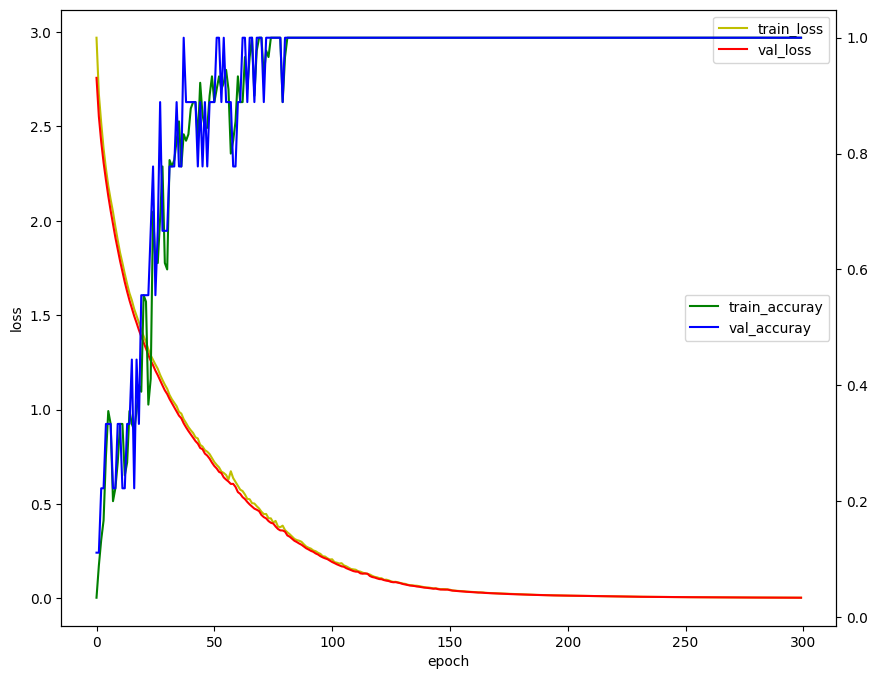

In [38]:
import matplotlib.pyplot as plt
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x 축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuray')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuray')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')
loss_ax.legend(loc='upper right')
acc_ax.legend(loc='center right')
plt.show()

In [40]:
# 모델 평가하기 (테스트데이터셋으로 모델 학습 설정과정의 loss, metrics)
score = model.evaluate(x_val, Y_val, batch_size=3)
print('loss:', score[0])
print('accuracy:', score[1])

3/3 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
loss: 0.003603449324145913
accuracy: 1.0


# 7. 모델 사용하기(모델을 이용해서 예측하기)

In [43]:
H = model.predict(np.array([2]))
H.argmax()

1/1 [==============================] - 0s 17ms/step


4

In [46]:
# 몇 %의 확률?
H[0, H.argmax()]*100

99.8822033405304

In [47]:
# 모델 저장
model.save('model/02_deep.h5')

In [50]:
# 저장된 모델 사용하기
model1 = load_model('model/02_deep.h5')

In [51]:
model.predict(np.array([3])).argmax()

1/1 [==============================] - 0s 17ms/step


6